# Kickoff Notebook - Project 07

To run this notebook you can use the flash2_pedro conda environment. Please do not install any package here. The best is if you can clone this environment ot a new one, or install the required packages in a new environment.

## Quickly fetch the allele counts/frequency and other parameters from a specific window in the genome

In [ ]:
from collections import Counter, defaultdict
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
import tqdm

def extract_kmers(seq, k=7):
    return [seq[i:i+k] for i in range(len(seq) - k + 1)]

def process_row(row):
    region = fetcher.fetch_pass_snvs(chrom=row.Chromosome, start=row.Start, end=row.End)
    region['zero_pos'] = region['pos'] - row.Start - 1
    
    all_kmers = extract_kmers(row.seq, k=7)
    total_kmer_counts = Counter(all_kmers)

    variation_kmer_counts = Counter()
    valid = region[(region['zero_pos'] >= 3) & (region['zero_pos'] <= len(row.seq) - 4)]
    
    for zero_pos in valid['zero_pos']:
        kmer = row.seq[zero_pos - 3 : zero_pos + 4]
        variation_kmer_counts[kmer] += 1

    return total_kmer_counts, variation_kmer_counts

# Parallel execution
with ThreadPoolExecutor(max_workers=8) as executor:
    results = list(tqdm.tqdm(executor.map(process_row, seqs.itertuples(index=False)), total=len(seqs)))

# Aggregate counts
total_kmer_counts = Counter()
variation_kmer_counts = Counter()

for total, var in results:
    total_kmer_counts.update(total)
    variation_kmer_counts.update(var)

# Compute variation frequency
kmer_data = []
for kmer in total_kmer_counts:
    total_count = total_kmer_counts[kmer]
    var_count = variation_kmer_counts.get(kmer, 0)
    freq = var_count / total_count
    kmer_data.append({
        'kmer': kmer,
        'total_count': total_count,
        'var_count': var_count,
        'var_freq': freq
    })

kmer_df = pd.DataFrame(kmer_data)


/opt/modules/i12g/anaconda/envs/ml4rg_p7_2/lib/python3.10/site-packages/gnomad_db/database.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [1]:
database_location = '/s/project/benchmark-lm/ssd-cache'
#database_location = '/data/nasif12/home_if12/s_gjamn/gnomad_cache'

#here I just used the data which is in our project, I hope it is the right one
#Ok it is not the right one. Here I am not working with the right data
#database_location = '/s/project/ml4rg_students/2025/project07/data'
db = gnomAD_DB(database_location, gnomad_version="v4")

NameError: name 'gnomAD_DB' is not defined

In [4]:
db.db_file

'/s/project/benchmark-lm/ssd-cache/gnomad_db.sqlite3'

In [5]:
#This I think it is just some start and finish to load the data 

interval_start = 1000000
interval_end = 2000000

#this I think it is for the data to be loaded 
df_region = db.get_info_for_interval(chrom=1, interval_start=interval_start, interval_end=interval_end, query="*")

You should only consider variants that pass their QC filters (e.g. `PASS` in the `filter` column).


In [6]:
#this is just to visualize how it should be the matrix representing the data

df_region[df_region['filter'] == 'PASS'] 

,chrom,pos,ref,alt,filter,AC,AN,AF,MQ,QD,...,VarDP,AS_VQSLOD,AC_grpmax,AN_grpmax,AF_grpmax,AF_eas,AF_nfe,AF_fin,AF_afr,AF_asj
0,1,1000001,G,T,PASS,1.0,151566.0,0.000007,59.9457,17.66670,...,105.0,-2.2368,1.0,5168.0,0.000193,0.000193,0.000000,0.0,0.000000,0.0
1,1,1000002,T,C,PASS,1.0,151266.0,0.000007,59.9748,19.13270,...,226.0,-1.0867,1.0,5132.0,0.000195,0.000195,0.000000,0.0,0.000000,0.0
2,1,1000002,T,G,PASS,1.0,151156.0,0.000007,59.9748,19.13270,...,226.0,3.7004,1.0,67744.0,0.000015,0.000000,0.000015,0.0,0.000000,0.0
3,1,1000006,G,A,PASS,5.0,151614.0,0.000033,60.0,12.45360,...,549.0,5.1104,5.0,4832.0,0.001035,0.000000,0.000000,0.0,0.000000,0.0
4,1,1000006,G,C,PASS,1.0,151506.0,0.000007,60.0,12.45360,...,549.0,5.0193,1.0,4836.0,0.000207,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377158,1,1999992,C,T,PASS,1.0,152006.0,0.000007,55.0771,5.35882,...,170.0,-2.4849,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,0.0
377159,1,1999993,G,A,PASS,294.0,152136.0,0.001932,59.0521,14.05260,...,16079.0,0.0339,279.0,41510.0,0.006721,0.000581,0.000015,0.0,0.006721,0.0
377160,1,1999995,C,T,PASS,1.0,152054.0,0.000007,59.5027,15.54300,...,256.0,0.6208,1.0,68020.0,0.000015,0.000000,0.000015,0.0,0.000000,0.0
377161,1,1999997,C,T,PASS,1.0,152060.0,0.000007,58.7809,12.35000,...,20.0,-2.1178,1.0,41396.0,0.000024,0.000000,0.000000,0.0,0.000024,0.0


- chrom-Chromosome number, 
- pos-Genomic position, 
- ref-Reference nucleotide(s) at that position, 
- alt-Alternate nucleotide(s) observed in the population, 
- filter-Quality filter status, 
- AC-Allele Count – how many times the alternate allele was seen in the data, 
- AN-Allele Number – total number of alleles observed at this site,
- AF-Allele Frequency – proportion of AC / AN

In [7]:
interval_length = interval_end - interval_start
df_region['len_ref'] = df_region['ref'].apply(len)
df_region['len_alt'] = df_region['alt'].apply(len)
df_region['is_snv'] = (df_region['len_ref'] == 1) & (df_region['len_alt'] == 1)

#calculates variant densities—how frequently variants appear—within a given genomic interval
df_region[df_region['filter'] == 'PASS']['pos'].unique().size/interval_length, df_region[(df_region['filter'] == 'PASS') & (df_region['is_snv'] == True)]['pos'].unique().size/interval_length

#obv here everything is 0 because I am not really working with any data

(0.249397, 0.230222)

On average we see a position with at least one variant in the population (regardless of its frequency) every 1/.23 bases ~ 4-5 bases

LDLR promoter region (region is upstream of the LDLR gene, which is involved in cholesterol metabolism)

In [8]:
# pandas max displayed columns to 100
pd.set_option('display.max_columns', 100)
ldlr_upstream_region_interval = (11087549, 11089551)
ldlr_chr = 19

df_region = db.get_info_for_interval(chrom=ldlr_chr, interval_start=ldlr_upstream_region_interval[0], interval_end=ldlr_upstream_region_interval[1], query="*")
df_region

,chrom,pos,ref,alt,filter,AC,AN,AF,MQ,QD,ReadPosRankSum,VarDP,AS_VQSLOD,AC_grpmax,AN_grpmax,AF_grpmax,AF_eas,AF_nfe,AF_fin,AF_afr,AF_asj
0,19,11087549,C,T,PASS,1.0,150800.0,0.000007,59.8265,17.19190,0.857,99.0,-0.6348,NaN,NaN,NaN,0.0,0.000000,0.0,0.000000,0.0
1,19,11087550,T,C,PASS,1.0,151718.0,0.000007,60.0,17.17390,0.424,46.0,4.8335,1.0,67936.0,0.000015,0.0,0.000015,0.0,0.000000,0.0
2,19,11087554,C,G,PASS,1.0,149664.0,0.000007,59.6771,12.86670,0.166,30.0,1.1907,1.0,67386.0,0.000015,0.0,0.000015,0.0,0.000000,0.0
3,19,11087561,A,T,AC0;AS_VQSR,0.0,143510.0,0.000000,59.9323,1.07377,0.756,122.0,-8.8454,NaN,NaN,NaN,0.0,0.000000,0.0,0.000000,0.0
4,19,11087564,G,A,PASS,1.0,148386.0,0.000007,59.5248,8.64179,-0.351,67.0,-0.5145,1.0,40194.0,0.000025,0.0,0.000000,0.0,0.000025,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,19,11089526,A,C,PASS,3.0,152152.0,0.000020,60.0,13.09220,1.226,206.0,5.1780,3.0,68030.0,0.000044,0.0,0.000044,0.0,0.000000,0.0
478,19,11089535,C,A,PASS,1.0,152156.0,0.000007,59.958,13.80260,0.693,152.0,7.6434,1.0,41448.0,0.000024,0.0,0.000000,0.0,0.000024,0.0
479,19,11089535,C,CA,PASS,3.0,152156.0,0.000020,59.958,13.80260,0.693,152.0,1.2823,3.0,41448.0,0.000072,0.0,0.000000,0.0,0.000072,0.0
480,19,11089536,A,G,PASS,2.0,152166.0,0.000013,60.0,15.21010,1.462,138.0,5.9164,2.0,68026.0,0.000029,0.0,0.000029,0.0,0.000000,0.0


AF -> allele frequency = AC/AN. You should only consider SNPs (substitution variants)

## Fetch the sequence of a specific region

This is only needed for the speciesLM model because GPN MSA already fetches the alignment and sequences from its dataloader.

In [9]:
import pandas as pd

regions_df = pd.DataFrame({'Chromosome': [f'chr{ldlr_chr}'], 'Start': [ldlr_upstream_region_interval[0]-1], 'End': [ldlr_upstream_region_interval[1]], 'Strand':['+']}) #ldlr_upstream_region_interval[0]-1 because in pyranges the coordinates are 0-based!
regions_df
#This regions_df is passed to a function that uses PyRanges to fetch the actual DNA sequence from a FASTA file for that region

,Chromosome,Start,End,Strand
0,chr19,11087548,11089551,+


In [10]:
#This codes takes a data frame with varinat information and fetches the sequence around the variant from a fasta file. It fetches a window with the same length as the context length of the model.
#In some rare cases that window will surpass the boundaries of a crhomosome (when the variant is close to the end of a chromosome). In that case, the variant is discarded (for now).
import pandas as pd
import pyranges as pr
import math 
from pathlib import Path
import numpy as np
from Bio import SeqIO

#fasta_path = Path("/s/project/ml4rg_students/2025/project07/data/GRCh38.primary_assembly.genome.fa")

#path to have access to the data (when using Species LM)

fasta_path = Path("/s/project/ml4rg_students/2025/project07/data/GRCh38.primary_assembly.genome.fa")

#Added comment-example of use: You’re working on a model that needs to see 2003 base pairs of DNA around a gene's promoter. 
# You already know where that promoter is on the genome (e.g., chromosome 19, position 11087549–11089551)
def fetch_sequence_from_region_df(regions_df, model_window_size, fasta_path=fasta_path):
    '''
    Fetches DNA sequences from genomic regions using a reference FASTA file.
    Input:
        - regions_df (pd.DataFrame): A DataFrame containing genomic regions with at least
                                     'Chromosome', 'Start', and 'End' columns.
        - model_window_size (int): The expected length of each DNA sequence to extract.
        - fasta_path (str): Path to the reference genome FASTA file from which sequences are extracted.

    Output:
        - seqs_df (pd.DataFrame): A new DataFrame including the original region information
                                  plus the following additional columns:
                                  * 'seq': the uppercase DNA sequence
                                  * 'seq_len': the length of the sequence (should equal model_window_size)
    '''
    
    #Added comment: Make a copy of the input DataFrame to avoid modifying the original
    seqs_df = regions_df.copy()

    seqs_df["index"] = np.arange(
            len(seqs_df)
        )  # Pyranges changes the ordering of the rows when converting to PyRanges. we first create a new column with the original order

    
    #Added comment: Convert the pandas DataFrame to a PyRanges object, which is optimized for genomic interval operations
    
    # create a pyranges df from the pandas df
    seqs_pr = pr.PyRanges(seqs_df)

    #Added comment: Fetch DNA sequences for each region using the FASTA file at fasta_path
    # The sequences are stored in the `.seq` attribute of the PyRanges object
    seqs_pr.seq = pr.get_sequence(
        seqs_pr, path=fasta_path
    )  # retrieve sequenc based on prepared start and end columns

    
    seqs_df = seqs_pr.df.copy()  # convert to pandas df

    seqs_df = (
        seqs_df.sort_values("index").reset_index(drop=True).copy()
    )  # sort the dataframe back to the original order

    #Added comment: Drop the temporary index column as it is no longer needed
    seqs_df = seqs_df.drop(columns=["index"])

    #Added comment: Convert all sequences to uppercase (standard for DNA: A, T, C, G)
    seqs_df["seq"] = seqs_df["seq"].apply(lambda x: x.upper())  # make seq uppercase
    
    seqs_df["seq_len"] = seqs_df["seq"].apply(lambda x: len(x))  # add a sequence length

    # assert  that the sequence length is the same as the model window size
    assert (
        seqs_df["seq_len"] == model_window_size
    ).all(), f"{seqs_df['seq_len']} is not {model_window_size}"


    return seqs_df

In [11]:
#For the speciesLM model the context length is 2003
seqs_df = fetch_sequence_from_region_df(regions_df, model_window_size=2003)
seqs_df

,Chromosome,Start,End,Strand,seq,seq_len
0,chr19,11087548,11089551,+,CTTCTCTAGGTGATTGCTAATTACTTCTTTTTTTTTTTTTTTTTTT...,2003


In [12]:
# it is important to assert that the reference sequence you obtain matches the reference nucleotides from the gnomAD database

In [13]:
ref_seq_df = pd.DataFrame({'seq': list(seqs_df['seq'][0]), 'pos': ldlr_upstream_region_interval[0] + np.arange(2003)})
ref_seq_df

,seq,pos
0,C,11087549
1,T,11087550
2,T,11087551
3,C,11087552
4,T,11087553
...,...,...
1998,G,11089547
1999,C,11089548
2000,A,11089549
2001,T,11089550


In [14]:
df_region

,chrom,pos,ref,alt,filter,AC,AN,AF,MQ,QD,ReadPosRankSum,VarDP,AS_VQSLOD,AC_grpmax,AN_grpmax,AF_grpmax,AF_eas,AF_nfe,AF_fin,AF_afr,AF_asj
0,19,11087549,C,T,PASS,1.0,150800.0,0.000007,59.8265,17.19190,0.857,99.0,-0.6348,NaN,NaN,NaN,0.0,0.000000,0.0,0.000000,0.0
1,19,11087550,T,C,PASS,1.0,151718.0,0.000007,60.0,17.17390,0.424,46.0,4.8335,1.0,67936.0,0.000015,0.0,0.000015,0.0,0.000000,0.0
2,19,11087554,C,G,PASS,1.0,149664.0,0.000007,59.6771,12.86670,0.166,30.0,1.1907,1.0,67386.0,0.000015,0.0,0.000015,0.0,0.000000,0.0
3,19,11087561,A,T,AC0;AS_VQSR,0.0,143510.0,0.000000,59.9323,1.07377,0.756,122.0,-8.8454,NaN,NaN,NaN,0.0,0.000000,0.0,0.000000,0.0
4,19,11087564,G,A,PASS,1.0,148386.0,0.000007,59.5248,8.64179,-0.351,67.0,-0.5145,1.0,40194.0,0.000025,0.0,0.000000,0.0,0.000025,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,19,11089526,A,C,PASS,3.0,152152.0,0.000020,60.0,13.09220,1.226,206.0,5.1780,3.0,68030.0,0.000044,0.0,0.000044,0.0,0.000000,0.0
478,19,11089535,C,A,PASS,1.0,152156.0,0.000007,59.958,13.80260,0.693,152.0,7.6434,1.0,41448.0,0.000024,0.0,0.000000,0.0,0.000024,0.0
479,19,11089535,C,CA,PASS,3.0,152156.0,0.000020,59.958,13.80260,0.693,152.0,1.2823,3.0,41448.0,0.000072,0.0,0.000000,0.0,0.000072,0.0
480,19,11089536,A,G,PASS,2.0,152166.0,0.000013,60.0,15.21010,1.462,138.0,5.9164,2.0,68026.0,0.000029,0.0,0.000029,0.0,0.000000,0.0


It is important to assert that the reference sequence you fetch is the same as the one used in the gnomad database. You might find some faster code to do this... but this works

In [15]:
assert len(df_region.merge(ref_seq_df, on='pos', how='inner')) == len(df_region), "Some or all fetched reference sequence nucleotides not match the gnomAD database nucleotides"

Sometimes you might be interested in fetching the sequence around a variant position. The following code fetches the sequence around specific variants stored in a dataframe.

In [16]:

#make chromosome Start End dict from the fasta file
def make_chrom_start_end_dict(fasta_file):
    '''
    make chromosome Start End dict from the fasta file
    Input:
        - fasta_file: path to the file that contains the data 

    Output:
        - chrom_sizes_dict: dictionary which contains the beginning and the end of every chromosome
    '''

    #Added comment: create the dictionary
    chrom_sizes_dict = {}

    #Added comment: for cicle over the data in the column fasta
    for record in SeqIO.parse(fasta_file, "fasta"):

        #Added comment: the key in the dictionary is the chromosome ID 
        chrom = record.id

        #Added comment: retrieve the size of the chromosome
        chrom_size = len(record.seq)

        #Added comment: add to the dictionary the chromosome size
        chrom_sizes_dict[chrom] = chrom_size

    #if os.path.exists(temp_unzipped_fasta_path):
    #    os.remove(temp_unzipped_fasta_path)

    return chrom_sizes_dict

chrom_sizes_dict = make_chrom_start_end_dict(fasta_path)

#Added comment: converts the dictionary in a data frame 
chrom_sizes_df = pd.DataFrame(chrom_sizes_dict.items(), columns=['Chromosome', 'End'])

#Added comment: it adds the start column and convert to 0-based the end
chrom_sizes_df['Start'] = 0
chrom_sizes_df['End'] = chrom_sizes_df['End'] - 1 # convert to 0-based

#Added comment: it filters the chromosomes by the standard ones keeping only the one which are "significative"
standard_chromosomes = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22',
       'chrX', 'chrY', 'chrM']

chrom_sizes_df = chrom_sizes_df[chrom_sizes_df['Chromosome'].isin(standard_chromosomes)].copy()
 

def get_sequences_from_var_df(vars_df, fasta_path, model_window_size, assert_all_refs_in_fasta=False, pos_column="pos"):
    '''
    From a data frame of genomics variantes the function extracts a DNA sequence centered on the variant from a 
    fasta file and gives back a new data frame containing the reference sequence, the muted sequence with the alternative 
    alleles, the validity controls on the basis and the corrects genomics coordinates
    
    Input:
        -vars_df: data frame containing the variants infos (must have 'Chromosome', 'pos', 'ref', 'alt')
        -fasta_path: path to the reference genome fasta file
        -model_window_size: size of the sequence window to extract
        -assert_all_refs_in_fasta: (optional) if True enforce that fasta and input reference alleles match
        -pos_column: name of the column with variant positions
        
    Output:
        -seqs_df: a new DataFrame with:
            *all original variant info
            *Start, End for window extraction
            *seq: reference sequence
            *seq_ALT: mutated sequence
            *ref_nuc_fasta: base in FASTA at the variant position
            *alt_nuc_seq: base in mutated sequence at the center (should match alt)
    '''
    
    print("Fetching sequences..")

    #Added comment: create the new data frame from the input
    seqs_df = vars_df.copy()

    #Added comment: add a 'Strand' column (which is required by PyRanges) with default value +
    if 'Strand' not in seqs_df.columns:
        seqs_df['Strand'] = '+'

    #Added comment: define start and end position for sequence extraction
    seqs_df["index"] = np.arange(
        len(seqs_df)
    )  # Pyranges changes the ordering of the rows when converting to PyRanges. we first create a new column with the original order
    
    #Added comment: since the new dataframe contains for every variant position a sequence centered in his index of lenght model_window_size
    # then the start will be index - model_window_size / 2 and the end  will be index + model_window_size / 2
    seqs_df["Start"] = seqs_df[pos_column] - model_window_size // 2
    seqs_df["End"] = seqs_df[pos_column] + math.ceil(model_window_size / 2)

    #Added comment: merge in chromosome sizes to know the bounds of each chromosome and
    # keep only those sequences that stay within chromosome boundaries
    seqs_w_chr_df = seqs_df.merge(
    chrom_sizes_df, on='Chromosome', how='inner', suffixes=('', '_chrom')
    ).copy()

    
    seqs_df = seqs_w_chr_df[(seqs_w_chr_df['Start'] >= 0) & (seqs_w_chr_df['End'] <= seqs_w_chr_df['End_chrom'])].copy()
    print('Removed {} windows that were out of chromosome bounds.'.format(len(seqs_w_chr_df) - len(seqs_df)))
    # create a pyranges df from the pandas df
    seqs_pr = pr.PyRanges(seqs_df)
    seqs_pr.seq = pr.get_sequence(
        seqs_pr, path=fasta_path
    )  # retrieve sequenc based on prepared start and end columns
    seqs_df = seqs_pr.df.copy()  # convert to pandas df
    seqs_df = (
        seqs_df.sort_values("index").reset_index(drop=True).copy()
    )  # sort the dataframe back to the original order
    seqs_df = seqs_df.drop(columns=["index"])

    seqs_df["seq"] = seqs_df["seq"].apply(lambda x: x.upper())  # make seq uppercase
    seqs_df["seq_len"] = seqs_df["seq"].apply(lambda x: len(x))  # add a sequence length

    # assert  that the sequence length is the same as the model window size
    assert (
        seqs_df["seq_len"] == model_window_size
    ).all(), f"{seqs_df['seq_len']} is not {model_window_size}"

    seqs_df['ref_nuc_fasta'] = seqs_df['seq'].apply(lambda x: x[model_window_size//2])      # extract center nucleotide
    #assert that the ref nucleotide in the data frame is the same as the one in the fetched sequence at the position of the variant

    ref_match = seqs_df['ref_nuc_fasta'] == seqs_df['ref']
    match_ratio = ref_match.sum() / len(ref_match)
    print('Ratio of ref nucs in data table that are also in the fasta:', match_ratio)

    if assert_all_refs_in_fasta:
        if not ref_match.all():
            mismatches = seqs_df.loc[~ref_match, ['Chromosome', pos_column, 'ref', 'ref_nuc_fasta']]
            print("\n[Warning] Mismatched reference nucleotides at these rows:")
            print(mismatches)
            print(f"Excluding {len(mismatches)} mismatched variants and proceeding...\n")
            
            # Filter out mismatches
            seqs_df = seqs_df[ref_match].reset_index(drop=True)

            #raise AssertionError("Some ref nucleotides in the variant table do not match those in the FASTA.")

    # introduce mutation and save as alternative sequence
    seqs_df["seq_ALT"] = seqs_df.apply(
        lambda row: row["seq"][: model_window_size // 2]
        + row["alt"]
        + row["seq"][(model_window_size // 2 + 1) :],
        axis=1,
    )
    seqs_df["seq_len_ALT"] = seqs_df["seq_ALT"].apply(lambda x: len(x))
    assert (
        seqs_df["seq_len_ALT"] == model_window_size
    ).all(), "(seqs_df['seq_len_ALT'] == model_window_size).all()"

    # assert that the alt nucleotide is the same as the one in the sequence at the position of the variant
    seqs_df["alt_nuc_seq"] = seqs_df["seq_ALT"].apply(
        lambda x: x[model_window_size // 2]
    )
    assert (
        seqs_df["alt_nuc_seq"] == seqs_df["alt"]
    ).all(), "(seqs_df['alt_nuc_seq'] == seqs_df['alt']).all()"

    return seqs_df   

In [17]:
toy_df = df_region.iloc[:3].copy()
toy_df =toy_df.rename(columns={'chrom': 'Chromosome'})
toy_df['pos'] = toy_df['pos'] - 1 # convert to 0-based coordinates
toy_df['Chromosome'] = toy_df['Chromosome'].apply(lambda x: f'chr{x}' if not x.startswith('chr') else x)
toy_df

,Chromosome,pos,ref,alt,filter,AC,AN,AF,MQ,QD,ReadPosRankSum,VarDP,AS_VQSLOD,AC_grpmax,AN_grpmax,AF_grpmax,AF_eas,AF_nfe,AF_fin,AF_afr,AF_asj
0,chr19,11087548,C,T,PASS,1.0,150800.0,0.000007,59.8265,17.1919,0.857,99.0,-0.6348,NaN,NaN,NaN,0.0,0.000000,0.0,0.0,0.0
1,chr19,11087549,T,C,PASS,1.0,151718.0,0.000007,60.0,17.1739,0.424,46.0,4.8335,1.0,67936.0,0.000015,0.0,0.000015,0.0,0.0,0.0
2,chr19,11087553,C,G,PASS,1.0,149664.0,0.000007,59.6771,12.8667,0.166,30.0,1.1907,1.0,67386.0,0.000015,0.0,0.000015,0.0,0.0,0.0


In [18]:
toy_df = get_sequences_from_var_df(toy_df, model_window_size=2003, fasta_path=fasta_path, assert_all_refs_in_fasta=True)
toy_df

Fetching sequences..
Removed 0 windows that were out of chromosome bounds.
Ratio of ref nucs in data table that are also in the fasta: 1.0


,Chromosome,pos,ref,alt,filter,AC,AN,AF,MQ,QD,ReadPosRankSum,VarDP,AS_VQSLOD,AC_grpmax,AN_grpmax,AF_grpmax,AF_eas,AF_nfe,AF_fin,AF_afr,AF_asj,Strand,Start,End,End_chrom,Start_chrom,seq,seq_len,ref_nuc_fasta,seq_ALT,seq_len_ALT,alt_nuc_seq
0,chr19,11087548,C,T,PASS,1.0,150800.0,0.000007,59.8265,17.1919,0.857,99.0,-0.6348,NaN,NaN,NaN,0.0,0.000000,0.0,0.0,0.0,+,11086547,11088550,58617615,0,TCCTGCCTCTGCCTCATGAGTAACTGAGACTACAGGCGCCCACCAC...,2003,C,TCCTGCCTCTGCCTCATGAGTAACTGAGACTACAGGCGCCCACCAC...,2003,T
1,chr19,11087549,T,C,PASS,1.0,151718.0,0.000007,60.0,17.1739,0.424,46.0,4.8335,1.0,67936.0,0.000015,0.0,0.000015,0.0,0.0,0.0,+,11086548,11088551,58617615,0,CCTGCCTCTGCCTCATGAGTAACTGAGACTACAGGCGCCCACCACC...,2003,T,CCTGCCTCTGCCTCATGAGTAACTGAGACTACAGGCGCCCACCACC...,2003,C
2,chr19,11087553,C,G,PASS,1.0,149664.0,0.000007,59.6771,12.8667,0.166,30.0,1.1907,1.0,67386.0,0.000015,0.0,0.000015,0.0,0.0,0.0,+,11086552,11088555,58617615,0,CCTCTGCCTCATGAGTAACTGAGACTACAGGCGCCCACCACCACGC...,2003,C,CCTCTGCCTCATGAGTAACTGAGACTACAGGCGCCCACCACCACGC...,2003,G


## Species LM - get Reconstruction probabilities for a specific region - LDLR promoter example

SpeciesLM is a BERT model which inputs sequences tokenized into overlapping 6-mers, together with a beginning of sentence, species and end of sentence token. 
The model outputs a reconstruction probability for each 6-mer at a position but we can aggregate the probabilities for a specific nucleotide. Here you have all the code to run the model and get the reconstruction probabilities per nucleotide and position for a specific region.

In [19]:
import pandas as pd
import numpy as np

In [20]:
from transformers import AutoModelForMaskedLM, AutoTokenizer
import torch
import torch.nn as nn
from torch.amp import autocast
import tqdm

# Load the model
model_name = "johahi/specieslm-metazoa-upstream-k6"
model = AutoModelForMaskedLM.from_pretrained(model_name, trust_remote_code=True)

# Load the corresponding tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

/opt/modules/i12g/anaconda/envs/ml4rg_p7_2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


You are using a model of type rotarybert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


In [21]:
#Added comment: Sets the computing device to CPU.
device = "cpu"
#Added comment: Moves the entire model (weights, layers, etc.) to the chosen device.
model.to(device)
#Added comment: Puts the model into evaluation mode.
model.eval()

RotaryBertForMaskedLM(
  (bert): RotaryBertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(4608, 768, padding_idx=0)
      (position_embeddings): Embedding(8192, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RotaryBertEncoder(
      (layer): ModuleList(
        (0-11): 12 x RotaryBertLayer(
          (attention): RotaryBertAttention(
            (self): RotaryBertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): La

In [22]:
proxy_species = 'homo_sapiens'
assert proxy_species in tokenizer.get_vocab()

In [23]:
from datasets import Dataset
#Added comment: from hugging face (🤗), it converts a data frame in a dataframe easily usable
from transformers import DefaultDataCollator
#Added comment: it tokenize data in batches with automatic padding 

def kmers(seq, k=6): #for codons, k = 6
    # splits a sequence into non-overlapping k-mers
    return [seq[i:i + k] for i in range(0, len(seq), k) if i + k <= len(seq)]

def kmers_stride1(seq, k=6):
    # splits a sequence into overlapping k-mers
    return [seq[i:i + k] for i in range(0, len(seq)-k+1)]  

def tok_func_species(x, proxy_species, seq_col):
    #Added comment: Tokenization function -> prepend species and tokenize overlapping k-mers
    # Create text string: "species kmer1 kmer2 kmer3..."
    # Then tokenize it using the shared tokenizer
    res = tokenizer(proxy_species + " " +  " ".join(kmers_stride1(x[seq_col])))
    return res

def tok_func_species_rolling_masking(x, proxy_species):
    #Added comment: tokenization for sequences that are already masked
    # Prepend species and tokenize the pre-masked sequence column
    res = tokenizer(proxy_species + x['seq_masked'])
 
    return res

def get_dataloader(dataset, seq_col, shuffle = True, bs = 4, 
                   has_label=True, provide_covariates=True, rolling_masking=False):
    '''
    Prepares a PyTorch DataLoader from a pandas DataFrame containing biological sequences.
    It tokenizes sequences using overlapping k-mers, adds optional covariates and labels, 
    and wraps the data into batches ready for training or evaluation with HuggingFace Transformers.

    Input:
        - dataset (pandas.DataFrame): A DataFrame containing sequence data and optional features/labels.
        - seq_col (str): The name of the column containing sequences.
        - shuffle (bool): Whether to shuffle the data in the DataLoader (default: True).
        - bs (int): Batch size for the DataLoader (default: 4).
        - has_label (bool): Whether the dataset includes a target column 'log_hl' to use as label (default: True).
        - provide_covariates (bool): Whether to include additional covariate features (default: True).
        - rolling_masking (bool): Whether to use a pre-masked sequence column ('seq_masked') instead of generating k-mers (default: False).

    Output:
        - data_loader (torch.utils.data.DataLoader): A DataLoader containing tokenized, padded batches
        (optionally with covariates and labels), ready for input into a HuggingFace model.    
    '''
    #tok_func = lambda x: tok_func_species(x, proxy_species, seq_col) 
    
    # Set initial list of columns to keep
    keys = [seq_col]
    
    # Optionally compute and include covariate features
    if provide_covariates:
        dataset["covariates"] = [x.astype('float') for x in np.array(dataset[codon_vars[:-1] + signif_vars[:-4]])]
        keys.append('covariates')

    # If labels are provided, rename and include them
    if has_label:
        dataset = dataset.rename(columns = {'log_hl' : 'label'})
        keys.append('label')
        
    # Convert the selected columns into a HuggingFace Dataset
    ds = Dataset.from_pandas(dataset[keys]) 

    #tok_ds = ds.map(tok_func, batched=False,  num_proc=12)

    # Apply tokenization to each example in the dataset
    if not rolling_masking:
        tok_ds = ds.map(
            lambda x: tok_func_species(x, proxy_species=proxy_species, seq_col=seq_col),
            batched=False,
            num_proc=12
            )

    else:
        ds.map(
            lambda x: tok_func_species_rolling_masking(x, proxy_species=proxy_species),
            batched=False,
            num_proc=12
            )
    
    # Remove the original raw sequence column after tokenization
    rem_tok_ds = tok_ds.remove_columns(seq_col)
    
    # Use DefaultDataCollator to handle padding and batching on the fly
    data_collator = DefaultDataCollator()

    # Create a PyTorch DataLoader for iterating batches during training/evaluation
    data_loader = torch.utils.data.DataLoader(
        rem_tok_ds, 
        batch_size=bs, 
        num_workers = 4, 
        shuffle = shuffle, 
        collate_fn = data_collator
        )
    
    return data_loader

ModuleNotFoundError: No module named 'datasets'

In [26]:
class ReconstructionModel(nn.Module):
    
    def __init__(self, lm, tokenizer, device=device, 
                 kmer_size = 6, 
                 left_special_tokens = 2,
                 right_special_tokens = 1,
                 only_predict_masked = False,
                 require_grad=False):
        super().__init__()

        #store arguments
        self.lm = lm                                            # language model (e.g., SpeciesLM)
        self.tokenizer = tokenizer                              # tokenizer for k-mers
        self.require_grad = require_grad                        # whether to track gradients
        self.only_predict_masked = only_predict_masked          # predict only masked nucleotides
        self.kmer_size = kmer_size                              # k-mer length (e.g., 6)
        self.device = device                                    # computing device (CPU or GPU)
        self.left_special_tokens = left_special_tokens          # tokens before sequence (e.g., species)
        self.right_special_tokens = right_special_tokens        # tokens after sequence (e.g., [CLS])

        # Create the filter mapping kmers to their final nucleotide
        self.create_prb_filter()
        
        self.word_embeddings = None                             # to store word embeddings if needed
        self.hook_dict = {}                                     # dictionary to store hooks (for gradient tracking)
        
    def set_grad_computation(self, switch):
        # Enable or disable gradient computation
        self.require_grad = switch
        
    def set_word_embedding_hook(self):
        # Register a hook to capture the embeddings during forward pass
        def getHook():
            def hook(model, input, output):
                output.retain_grad()
                self.word_embeddings = output
            return hook
        self.hook_dict["words"] = self.lm.bert.embeddings.word_embeddings.register_forward_hook(getHook())
        
    def create_prb_filter(self):
        """
        Make a convolutional filter for each nt
        The way this works:
        Take the kmer ACGTGC which maps to token 739, its last nt is C
        This would be the prediction for the masked nucleotide from this kmer, if the kmer is the first in a masked span
        So the first row of column 739 searches for C, in other words filter_xyz = 1 for x = 0, y = 739, z = 2
        Equally, the second row of column 739 searches for G etc...
        
        Builds a 3D filter (shape: [k, 4**k, 4]) that maps each k-mer token to the nucleotide it ends with.
        This is used to convert k-mer probabilities to per-nucleotide predictions.
        """

        # Get the vocabulary from the tokenizer (maps k-mer strings to token IDs)
        vocab = tokenizer.get_vocab()

        # Generate all possible k-mers using combinations of "A", "C", "G", "T"
        # For k=6 → 4096 k-mers (4^6 combinations)
        kmer_list = ["".join(x) for x in itertools.product("ACGT",repeat=6)]

        # Mapping from nucleotide character to index (A=0, C=1, G=2, T=3)
        nt_mapping = {"A":0,"C":1,"G":2,"T":3}

        # Initialize the filter: shape [k, vocab_size, 4]
        #   - k: position in the k-mer (0 to k-1)
        #   - vocab_size: number of k-mers (4^k)
        #   - 4: number of nucleotides (A, C, G, T)
        prb_filter = np.zeros((self.kmer_size, 4**self.kmer_size, 4))

        # For each k-mer string, determine its token ID and its nucleotides
        for kmer in kmer_list:
            # Get the token index for the k-mer
            # Assumes the tokenizer vocabulary has 5 special tokens at the beginning, so we subtract 5
            token = vocab[kmer] - 5 # there are 5 special tokens

            # For each position in the k-mer, update the filter
            for idx, nt in enumerate(kmer):
                # Map the nucleotide character to its index (0–3)
                nt_idx = nt_mapping[nt]

                # Fill the filter at:
                # [position in k-mer (reversed), token index, nucleotide index] = 1
                #
                # NOTE: self.kmer_size - 1 - idx reverses the k-mer so that the
                # last character is at position 0 (important for masking logic).
                prb_filter[5-idx, token, nt_idx] = 1

        # Convert to torch tensor and move to the correct device
        prb_filter = torch.from_numpy(prb_filter)

        # Convert the numpy filter array to a PyTorch tensor,
        # cast it to float32 (required for neural network operations),
        # and move it to the appropriate device (CPU or GPU)
        self.prb_filter = prb_filter.to(self.device).float() # k, 4**k, 4
    
    @autocast(device)   # Enable mixed precision on the specified device (saves memory & speeds up on GPUs)
    def forward(self, tokens):
        # Enable or disable gradient computation depending on the model setting
        grad_context = contextlib.nullcontext() if self.require_grad else torch.no_grad()

        with grad_context:
            # Run the forward pass of the language model (e.g., RotaryBERT)
            # Output: predictions is a dict with "logits" of shape (B, L_in, vocab_size)
            predictions = self.lm(tokens)["logits"] # Dim: B, L_in, vocab_size

            # Remove logits for the first 5 special tokens → only keep k-mer logits
            logits = predictions[:,:,5:(5+self.prb_filter.shape[1])] # remove any non k-mer dims (there are 5 special tokens)

            # Apply softmax to get probability distribution over k-mers
            kmer_preds = torch.softmax(logits,dim=2)

            # remove special tokens:
            # Remove the left/right special tokens (e.g., species prefix, [CLS]/[SEP] etc.)
            kmer_preds = kmer_preds[:,(self.left_special_tokens):(kmer_preds.shape[1] - self.right_special_tokens),:]

            # pad to predict first k-1 and last k-1 nt
            # Pad with zeros on both sides so we can extract valid k-mer windows at the ends
            kmer_pad = torch.zeros((kmer_preds.shape[0], (self.kmer_size-1), kmer_preds.shape[2]),device=self.device)

            # Concatenate padding before and after the sequence
            kmer_preds = torch.concat([kmer_pad,kmer_preds,kmer_pad],axis=1)

            # reshape so that each span (representing one nucleotide) is its own entry
            # Create sliding windows over the sequence to simulate overlapping k-mers
            # Resulting shape: (B, L_seq, k, vocab_k)
            kmer_preds = kmer_preds.unfold(dimension=1,size=self.kmer_size,step=1).swapaxes(2,3) # B, L_seq, k, 4**k

            # convert kmer predictions to nucleotide predictions
            # Add a dimension for nucleotides and broadcast to match prb_filter shape
            # Shape becomes (B, L_seq, vocab_k, k, 4)
            nt_preds = kmer_preds.unsqueeze(-1).expand((kmer_preds.shape[0],kmer_preds.shape[1],kmer_preds.shape[2],kmer_preds.shape[3],4)) # B, L_seq, k, 4**k, 4

            # Multiply with prebuilt filter → sum over vocab & k-mer positions to get nucleotide predictions
            # Final shape: (B, L_seq, 4), where 4 = [A, C, G, T]
            nt_preds = (nt_preds * self.prb_filter).sum(axis=(2,3)) # B, L_seq, 4

            # renormalize so that it sums to one
            # Normalize by number of overlapping k-mers (i.e., k)
            nt_prbs = nt_preds/self.kmer_size

            # If we want to predict only masked positions (used for masked LM evaluation)
            if self.only_predict_masked: # only record predictions for properly masked spans
                # find the properly masked spans
                # remove special tokens
                tokens = tokens[:,self.left_special_tokens:(tokens.shape[1] - self.right_special_tokens)]
                # pad with mask token (to ensure edge cases become spans)
                token_pad = torch.zeros((tokens.shape[0],self.kmer_size-1), dtype=torch.int64, device=self.device) + 4
                tokens = torch.concat([token_pad,tokens,token_pad],axis=1)
                # unfold to B, L_seq, k
                tokens = tokens.unfold(dimension=1,size=self.kmer_size,step=1)
                # find masked spans
                masked_positions = ((tokens == 4).sum(axis=2) == self.kmer_size)
                nt_prbs = nt_prbs * masked_positions.unsqueeze(-1) # mask
        return nt_prbs
    
    def mask_tokens(self, tokens):
        # create diagonal identity matrix of the same shape as basis for the masking
        diag_matrix = torch.eye(tokens.shape[1]).numpy()
        # propagate the ones to kmer-sized spans

        # For each row, apply a 1D convolution with a window of size `kmer_size`
        # This simulates a mask that spans `kmer_size` consecutive positions
        # Result: a binary matrix where each row has 1s in a k-mer span
        masked_indices = np.apply_along_axis(
            lambda m : np.convolve(m, [1] * self.kmer_size, mode = 'same' ),
            axis = 1, 
            arr = diag_matrix
            ).astype(bool)

        # Convert the result back to a PyTorch tensor (boolean mask)
        masked_indices = torch.from_numpy(masked_indices)

        # do not mask special tokens and do not repeat at edges (this math works for k = 6, unclear if it generalizes)
        # Remove positions corresponding to special tokens and boundary positions
        # The slicing avoids applying masks too close to the sequence edges
        masked_indices = masked_indices[
            (self.kmer_size // 2 - 1) + self.left_special_tokens : 
            -((self.kmer_size // 2 ) + self.right_special_tokens)
            ]

        # Expand the token input so we can create one masked copy per row in the mask
        # Shape becomes (batch_size, num_masks, sequence_length)
        masked_tokens = tokens.unsqueeze(1).expand(
            tokens.shape[0],
            masked_indices.shape[0],
            tokens.shape[1]
            ).clone() # reshape

        # Apply the mask: replace masked positions with token ID 4 (usually [MASK])
        masked_tokens[:,masked_indices] = 4 # mask

        # Return the masked versions of the tokens
        return masked_tokens    # Shape: (B, num_masked_positions, L)
    
    def predict_all_from_dataloader(self, data_loader):

        # Ensure the model is set to predict all positions, not just masked ones
        assert not self.only_predict_masked

        output_arrays = []

        # Iterate through the data loader with a progress bar
        for i, batch in tqdm.tqdm(enumerate(data_loader)):
            # get some tokenized sequences (B, L_in)
            # Get the input token IDs from the current batch
            # Shape: (batch_size, sequence_length)
            tokens = batch['input_ids']

            # predict
            # Pass tokens through the model to get nucleotide probability predictions
            # Shape: (batch_size, sequence_length, 4) → for A, C, G, T
            outputs = self(tokens.to(self.device)) # B, L_seq, 4

            # Move the result from GPU to CPU to save memory on the device
            output_arrays.append(outputs.cpu()) # send to cpu to conserve memory
        
        # rebuild to B, L_seq, 4
        # Concatenate all batch results into one tensor
        # Final shape: (total_sequences, sequence_length, 4)
        predictions = torch.concat(output_arrays, axis=0)
        return predictions
    
    def predict_all_from_dataloader_masked(self, 
                                          data_loader,
                                          batch_size = 128):
        all_preds = []  # To collect predictions from all groups in the DataLoader

        for i, group in enumerate(data_loader):
            output_arrays = []
            # get some tokenized sequences (B, L_in)
            tokens = group['input_ids']
            # mask them
            masked_tokens = self.mask_tokens(tokens)
            # remember the number of sequences (shape[0] = B) and number of maskings (shape[1] = n_masked)
            group_shape = masked_tokens.shape
            # reshape to B*n_masked, L_in
            masked_tokens = masked_tokens.reshape(masked_tokens.shape[0]*masked_tokens.shape[1], masked_tokens.shape[2])
            token_loader = torch.utils.data.DataLoader(masked_tokens, batch_size=batch_size, 
                                                       num_workers = 4, shuffle = False, collate_fn = None)
            # predict
            for j, batch in enumerate(token_loader):
                outputs = self(batch.to(self.device)) # b, L_seq, 4
                output_arrays.append(outputs.cpu()) # send to cpu to conserve memory
            # rebuild to B*n_masked, L_seq, 4
            predictions = torch.concat(output_arrays, axis=0)
            # reshape to B, n_masked, L_seq, 4
            predictions = predictions.reshape((group_shape[0],group_shape[1],predictions.shape[1],predictions.shape[2]))
            if self.only_predict_masked:
                predictions = predictions.sum(axis=1)
            all_preds.append(predictions)
        predictions = torch.concat(all_preds, axis=0)
        return predictions

Human LDLR 2kb 5' of the start codon

In [27]:
ldlr_five_prime_seq = seqs_df['seq'].values[0]
ldlr_five_prime_seq

'CTTCTCTAGGTGATTGCTAATTACTTCTTTTTTTTTTTTTTTTTTTGAGACGGAGTCTCACTCTGTCGCCCAGGCTGGAGTACAGTGGCGCAATCTCGTCTCACTGCAAACTCCACCTCCCGGGTTCACGCCATTCTCCTGCCTCAGCCTCCCGAGTAGCTGGGACTACAGGCACCCGCCACCACGCCCGGCTAATTTTTTGTATTTTTTTTTAGTAGAGGTGGGGTTTCACTGTGTTATCCAGGATGGTCTTGATCTCCTGACCTCGTGATCCACCTGCCTCAGCCTCCCAAAGTGCTGGGATTACAGGCGTGAGCCACCATGCCCAGCCCGCTAATTATTTCAATTTGACCTTGACACTGAGCCTGCCAAGTAGGTTCAAGCATTTTGATGGCCCCTTTACAGGTTGGGAAAGCTAATTTATCTGTCCAAGGCCGAATTCTGAAACTGAGTCTTAACTGCCAAAAATTCTTATCATCAATTTCTTCTTCTGGGTTGGGCACAGTGGCTCATGCCTGTAAAGCCAGCAATTTGAGAGGCATCATGATGCAAGAGGAAGAGGATTGAGTGAAGCTAGGAGTTTGGGACCAGCCTGGGCAACATAGTGAGACCCCATCTATAAAAAAAAATTAAAAATTAGTTGGGCATGGTGGTGCACTCCTGTGGTCCTAGCTATTCAGGAGGCTGAGGTGGGAGGATTCCTTGAGCCCAGGGTTGACGCTGCAGAGAGCTGTGATCACGCCACTGCAGTCCAGCCTGAGTGACAGCTGGAAATAATGATAAATAAATAATAAATAATTATTTAAAAAATTATAATAAAAATAATTAAAAAATTATTTTCCCTGATTAATCTTTTTTTTTGTCCTTCTGAGAGTTCAATTTGTCCCTTTTCTGCCTGGTCTCCTAGGTTTCCCTAAAATCCTGCTGAGAGGTTAGCACTGCCTGCCAAAGTCAGTTTGCAAAATCCCAGAGAAATCCAGCTTATTCCTGGGGGAACCG

In [28]:
import itertools

In [29]:
#import itertools  #We needed to import itertools to create kmer_list

seq_col = 'seq'
batch_size = 10
dataset = pd.DataFrame({'seq': [ldlr_five_prime_seq]})
dl = get_dataloader(dataset, shuffle = False, bs = batch_size, seq_col = seq_col, has_label=False, provide_covariates=False) 

reconstructor = ReconstructionModel(model, tokenizer, require_grad=False, only_predict_masked=True)
snp_reconstruct = reconstructor.predict_all_from_dataloader_masked(dl, batch_size=batch_size)

NameError: name 'get_dataloader' is not defined

In [30]:
snp_reconstruct.shape

NameError: name 'snp_reconstruct' is not defined

The following contains functions to plot the reconstruction predicted by the LM (not relevant to understand this code)

In [31]:
import matplotlib
import matplotlib.pyplot as plt

def ic_scale(pwm,background):
    odds_ratio = ((pwm+0.001)/(1.004))/(background[None,:])
    ic = ((np.log((pwm+0.001)/(1.004))/np.log(2))*pwm -\
            (np.log(background)*background/np.log(2))[None,:])
    return pwm*(np.sum(ic,axis=1)[:,None])


def plot_a(ax, base, left_edge, height, color):
    a_polygon_coords = [
        np.array([
           [0.0, 0.0],
           [0.5, 1.0],
           [0.5, 0.8],
           [0.2, 0.0],
        ]),
        np.array([
           [1.0, 0.0],
           [0.5, 1.0],
           [0.5, 0.8],
           [0.8, 0.0],
        ]),
        np.array([
           [0.225, 0.45],
           [0.775, 0.45],
           [0.85, 0.3],
           [0.15, 0.3],
        ])
    ]
    for polygon_coords in a_polygon_coords:
        ax.add_patch(
            matplotlib.patches.Polygon(
                (np.array([1,height])[None,:]*polygon_coords
                 + np.array([left_edge,base])[None,:]),
                facecolor=color, edgecolor=color))


def plot_c(ax, base, left_edge, height, color):
    ax.add_patch(matplotlib.patches.Ellipse(
        xy=[left_edge+0.65, base+0.5*height], width=1.3, height=height,
        facecolor=color, edgecolor=color))
    ax.add_patch(matplotlib.patches.Ellipse(
        xy=[left_edge+0.65, base+0.5*height], width=0.7*1.3, height=0.7*height,
        facecolor='white', edgecolor='white'))
    ax.add_patch(matplotlib.patches.Rectangle(
        xy=[left_edge+1, base], width=1.0, height=height,
        facecolor='white', edgecolor='white', fill=True))


def plot_g(ax, base, left_edge, height, color):
    ax.add_patch(matplotlib.patches.Ellipse(
        xy=[left_edge+0.65, base+0.5*height], width=1.3, height=height,
        facecolor=color, edgecolor=color))
    ax.add_patch(matplotlib.patches.Ellipse(
        xy=[left_edge+0.65, base+0.5*height], width=0.7*1.3, height=0.7*height,
        facecolor='white', edgecolor='white'))
    ax.add_patch(matplotlib.patches.Rectangle(
        xy=[left_edge+1, base], width=1.0, height=height,
        facecolor='white', edgecolor='white', fill=True))
    ax.add_patch(matplotlib.patches.Rectangle(
        xy=[left_edge+0.825, base+0.085*height],
        width=0.174, height=0.415*height,
        facecolor=color, edgecolor=color, fill=True))
    ax.add_patch(matplotlib.patches.Rectangle(
        xy=[left_edge+0.625, base+0.35*height],
        width=0.374, height=0.15*height,
        facecolor=color, edgecolor=color, fill=True))


def plot_t(ax, base, left_edge, height, color):
    ax.add_patch(
        matplotlib.patches.Rectangle(xy=[left_edge+0.4, base],
        width=0.2, height=height, facecolor=color, edgecolor=color, fill=True))
    ax.add_patch(
        matplotlib.patches.Rectangle(xy=[left_edge, base+0.8*height],
        width=1.0, height=0.2*height, facecolor=color,
        edgecolor=color, fill=True))

    
def plot_u(ax, base, left_edge, height, color):
    ax.add_patch(matplotlib.patches.Ellipse(
        xy=[left_edge+0.5, base+0.4*height], width=0.95, height=0.8*height,
        facecolor=color, edgecolor=color))
    ax.add_patch(matplotlib.patches.Rectangle(
        xy=[left_edge+0.025, base+0.4*height], width=0.95, height=0.6*height,
        facecolor=color, edgecolor=color, fill=True))
    ax.add_patch(matplotlib.patches.Ellipse(
        xy=[left_edge+0.5, base+0.4*height], width=0.6175, height=0.52*height,
        facecolor='white', edgecolor='white'))
    ax.add_patch(matplotlib.patches.Rectangle(
        xy=[left_edge+0.19125, base+0.4*height], width=0.6175, height=0.6*height,
        facecolor='white', edgecolor='white', fill=True))
    """ax.add_patch(matplotlib.patches.Ellipse(
        xy=[left_edge+0.65, base+0.5*height], width=0.7*1.3, height=0.7*height,
        facecolor='white', edgecolor='white'))
    ax.add_patch(matplotlib.patches.Rectangle(
        xy=[left_edge+1, base], width=1.0, height=height,
        facecolor='white', edgecolor='white', fill=True))"""
    

default_colors = {0:'green', 1:'blue', 2:'orange', 3:'red'}
dna_plot_funcs = {0:plot_a, 1:plot_c, 2:plot_g, 3:plot_t}
rna_plot_funcs = {0:plot_a, 1:plot_c, 2:plot_g, 3:plot_u}


def plot_weights_given_ax(ax, array,          
                 height_padding_factor=0.2,
                 length_padding=1.0,
                 subticks_frequency="auto",
                 colors=default_colors,
                 plot_funcs=dna_plot_funcs,
                 highlight={},
                 ylabel=""):
    if len(array.shape)==3:
        array = np.squeeze(array)
    assert len(array.shape)==2, array.shape
    if (array.shape[0]==4 and array.shape[1] != 4):
        array = array.transpose(1,0)
    assert array.shape[1]==4
    if (subticks_frequency=="auto"):
        subticks_frequency = 1.0 if len(array) <= 40 else int(len(array)/40)
    max_pos_height = 0.0
    min_neg_height = 0.0
    heights_at_positions = []
    depths_at_positions = []
    for i in range(array.shape[0]):
        #sort from smallest to highest magnitude
        acgt_vals = sorted(enumerate(array[i,:]), key=lambda x: abs(x[1]))
        positive_height_so_far = 0.0
        negative_height_so_far = 0.0
        for letter in acgt_vals:
            plot_func = plot_funcs[letter[0]]
            color=colors[letter[0]]
            if (letter[1] > 0):
                height_so_far = positive_height_so_far
                positive_height_so_far += letter[1]                
            else:
                height_so_far = negative_height_so_far
                negative_height_so_far += letter[1]
            plot_func(ax=ax, base=height_so_far,
                      left_edge=i+0.5, height=letter[1], color=color)
        max_pos_height = max(max_pos_height, positive_height_so_far)
        min_neg_height = min(min_neg_height, negative_height_so_far)
        heights_at_positions.append(positive_height_so_far)
        depths_at_positions.append(negative_height_so_far)

    #now highlight any desired positions; the key of
    #the highlight dict should be the color
    for color in highlight:
        for start_pos, end_pos in highlight[color]:
            assert start_pos >= 0.0 and end_pos <= array.shape[0]
            min_depth = np.min(depths_at_positions[start_pos:end_pos])
            max_height = np.max(heights_at_positions[start_pos:end_pos])
            ax.add_patch(
                matplotlib.patches.Rectangle(xy=[start_pos,min_depth],
                    width=end_pos-start_pos,
                    height=max_height-min_depth,
                    edgecolor=color, fill=False))
            
    ax.set_xlim(0.5-length_padding, 0.5+array.shape[0]+length_padding)
    ax.xaxis.set_ticks(np.arange(1.0, array.shape[0]+1, subticks_frequency))
    height_padding = max(abs(min_neg_height)*(height_padding_factor),
                         abs(max_pos_height)*(height_padding_factor))
    ax.set_ylim(min_neg_height-height_padding, max_pos_height+height_padding)
    ax.set_ylabel(ylabel)
    ax.yaxis.label.set_fontsize(15)


def plot_weights(array,
                 figsize=(20,2),
                 ax_transform_func=lambda x: x,
                 **kwargs):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111) 
    ax_transform_func(ax)
    plot_weights_given_ax(ax=ax,
        array=array,
        **kwargs)
    plt.show()
    
    
def dna_plot_weights(array, **kwargs):
  plot_weights(array=array, plot_funcs=dna_plot_funcs, **kwargs)


def rna_plot_weights(array, **kwargs):
  plot_weights(array=array, plot_funcs=rna_plot_funcs, **kwargs)

In [32]:
#computes per position information content to scale the probabilities for better visualization

def compute_per_position_ic(ppm, 
                            background=torch.tensor([0.295, 0.205, 0.205, 0.295]), #[0.295, 0.205, 0.205, 0.295]background nucleotide frequency in Human
                            pseudocount=0):
    ppm=ppm.unsqueeze(0)
    alphabet_len = len(background)
    bg = torch.log2(background)*background
    pseudocounted_ppm = (ppm+pseudocount)/(1 + pseudocount*alphabet_len)
    ic = torch.log2(pseudocounted_ppm)*ppm - bg.unsqueeze(0)
    return torch.sum(ic,axis=2)

In [33]:
i=0
plot_weights((snp_reconstruct[i]*compute_per_position_ic(snp_reconstruct[i]).swapaxes(0,1)).numpy(), subticks_frequency=50)


NameError: name 'snp_reconstruct' is not defined

In [34]:
plot_weights((snp_reconstruct[i]*compute_per_position_ic(snp_reconstruct[i]).swapaxes(0,1)).numpy()[1764:1874], subticks_frequency=50)


NameError: name 'snp_reconstruct' is not defined

This reconstruction highlights 3 TF motifs in the promoter of the LDLR gene

How do the allele frequencies look like at this region?

In [35]:
ref_seq_df = pd.DataFrame({'seq': list(ldlr_five_prime_seq), 'pos': ldlr_upstream_region_interval[0] + np.arange(2003), 'relative_pos': np.arange(2003)})
ref_seq_df


,seq,pos,relative_pos
0,C,11087549,0
1,T,11087550,1
2,T,11087551,2
3,C,11087552,3
4,T,11087553,4
...,...,...,...
1998,G,11089547,1998
1999,C,11089548,1999
2000,A,11089549,2000
2001,T,11089550,2001


In [36]:
df_region['is_polymorfic_pos'] = True

In [37]:
ref_seq_w_afrequency_df = ref_seq_df.merge(df_region[['pos','is_polymorfic_pos']].drop_duplicates(), how='left')
ref_seq_w_afrequency_df.fillna(False, inplace=True)
ref_seq_w_afrequency_df

/scratch/tmp/s_aariz/ipykernel_2627180/309387599.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ref_seq_w_afrequency_df.fillna(False, inplace=True)


,seq,pos,relative_pos,is_polymorfic_pos
0,C,11087549,0,True
1,T,11087550,1,True
2,T,11087551,2,False
3,C,11087552,3,False
4,T,11087553,4,False
...,...,...,...,...
1998,G,11089547,1998,False
1999,C,11089548,1999,False
2000,A,11089549,2000,False
2001,T,11089550,2001,False


The following plots whether a position has a variant in at least one indivdual out of the 76k

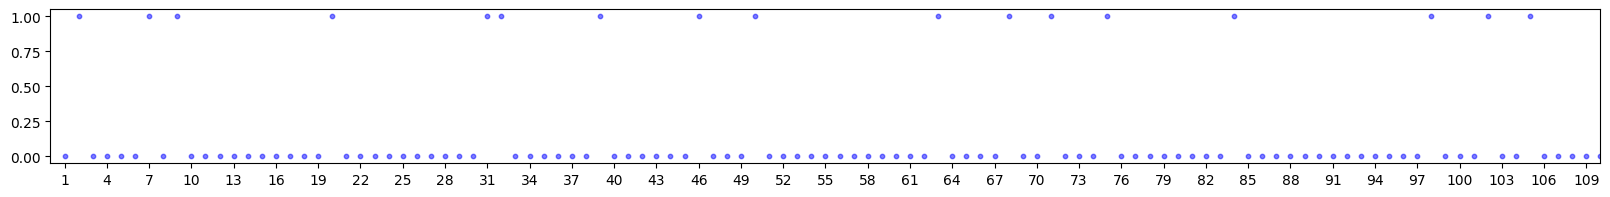

In [38]:
# plot is polymorif against position in a nice wide scatterplot

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 2))
df_focus_region = ref_seq_w_afrequency_df[(ref_seq_w_afrequency_df['relative_pos'] >= 1764) & (ref_seq_w_afrequency_df['relative_pos'] <= 1874)]
#have x axis limits between 1 and 1874-1764+1
plt.xlim(0, 1874-1764)
#have ticks every 3 bases
plt.xticks(np.arange(1, 1874-1764+1, 3))
plt.scatter(df_focus_region['relative_pos']-1764+1, df_focus_region['is_polymorfic_pos'], s=10, color='blue', alpha=0.5)

In [39]:
plot_weights((snp_reconstruct[i]*compute_per_position_ic(snp_reconstruct[i]).swapaxes(0,1)).numpy()[1764:1874], subticks_frequency=3)


NameError: name 'snp_reconstruct' is not defined

In [40]:
ref_seq_w_afrequency_df = ref_seq_df.merge(df_region, how='left')
ref_seq_w_afrequency_df.fillna(0, inplace=True)
ref_seq_w_afrequency_df

,seq,pos,relative_pos,chrom,ref,alt,filter,AC,AN,AF,MQ,QD,ReadPosRankSum,VarDP,AS_VQSLOD,AC_grpmax,AN_grpmax,AF_grpmax,AF_eas,AF_nfe,AF_fin,AF_afr,AF_asj,is_polymorfic_pos
0,C,11087549,0,19,C,T,PASS,1.0,150800.0,0.000007,59.8265,17.1919,0.857,99.0,-0.6348,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,True
1,T,11087550,1,19,T,C,PASS,1.0,151718.0,0.000007,60.0,17.1739,0.424,46.0,4.8335,1.0,67936.0,0.000015,0.0,0.000015,0.0,0.0,0.0,True
2,T,11087551,2,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
3,C,11087552,3,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
4,T,11087553,4,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,G,11089547,1998,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
2075,C,11089548,1999,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
2076,A,11089549,2000,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
2077,T,11089550,2001,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0


In [41]:
ref_seq_max_alternative_af_df = ref_seq_w_afrequency_df.groupby('relative_pos')[['AF']].max().reset_index()
ref_seq_max_alternative_af_df

,relative_pos,AF
0,0,0.000007
1,1,0.000007
2,2,0.000000
3,3,0.000000
4,4,0.000000
...,...,...
1998,1998,0.000000
1999,1999,0.000000
2000,2000,0.000000
2001,2001,0.000000


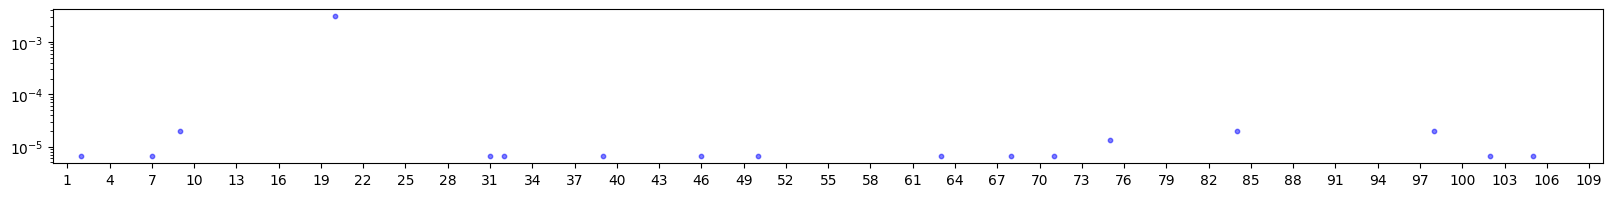

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 2))
df_focus_region = ref_seq_max_alternative_af_df[(ref_seq_max_alternative_af_df['relative_pos'] >= 1764) & (ref_seq_max_alternative_af_df['relative_pos'] <= 1874)]
#have x axis limits between 1 and 1874-1764+1
plt.xlim(0, 1874-1764)
#have ticks every 3 bases
plt.xticks(np.arange(1, 1874-1764+1, 3))
#log scale y
plt.yscale('log')

plt.scatter(df_focus_region['relative_pos']-1764+1, df_focus_region['AF'], s=10, color='blue', alpha=0.5)

In [43]:
plot_weights((snp_reconstruct[i]*compute_per_position_ic(snp_reconstruct[i]).swapaxes(0,1)).numpy()[1764:1874], subticks_frequency=3)


NameError: name 'snp_reconstruct' is not defined

In [44]:
ref_seq_w_afrequency_df[(ref_seq_w_afrequency_df['relative_pos'] >= 1764) & (ref_seq_w_afrequency_df['relative_pos'] < 1874)]

,seq,pos,relative_pos,chrom,ref,alt,filter,AC,AN,AF,MQ,QD,ReadPosRankSum,VarDP,AS_VQSLOD,AC_grpmax,AN_grpmax,AF_grpmax,AF_eas,AF_nfe,AF_fin,AF_afr,AF_asj,is_polymorfic_pos
1837,G,11089313,1764,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
1838,C,11089314,1765,19,CTT,C,PASS,1.0,152146.0,0.000007,60.0,21.6842,-1.28,19.0,0.3414,1.0,4824.0,0.000207,0.0,0.0,0.0,0.0,0.0,True
1839,T,11089315,1766,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
1840,T,11089316,1767,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
1841,C,11089317,1768,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,G,11089418,1869,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
1943,C,11089419,1870,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
1944,T,11089420,1871,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
1945,A,11089421,1872,0,0,0,0,0.0,0.0,0.000000,0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0


## GPN-MSA

This model was trained on sequences spanning 128bp with the corresponding alignment (MSA) to 90 vertebrate species.

In [45]:
import os
from gpn.data import GenomeMSA, Tokenizer
import gpn.model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch
from transformers import AutoModel, AutoModelForMaskedLM

ModuleNotFoundError: No module named 'gpn.data'

In [46]:
model_path = "songlab/gpn-msa-sapiens"
#'zip:///::https://huggingface.co/datasets/songlab/multiz100way/resolve/main/89.zarr.zip'
msa_path = "/s/project/benchmark-lm/ssd-cache/89.zarr"

## Prepare model and dataloader

In [47]:
genome_msa = GenomeMSA(msa_path)  # can take a minute or two

NameError: name 'GenomeMSA' is not defined

In [48]:
model = AutoModelForMaskedLM.from_pretrained(model_path)
model.eval();

ValueError: The checkpoint you are trying to load has model type `GPNRoFormer` but Transformers does not recognize this architecture. This could be because of an issue with the checkpoint, or because your version of Transformers is out of date.

You can update Transformers with the command `pip install --upgrade transformers`. If this does not work, and the checkpoint is very new, then there may not be a release version that supports this model yet. In this case, you can get the most up-to-date code by installing Transformers from source with the command `pip install git+https://github.com/huggingface/transformers.git`

In [49]:
model

RotaryBertForMaskedLM(
  (bert): RotaryBertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(4608, 768, padding_idx=0)
      (position_embeddings): Embedding(8192, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RotaryBertEncoder(
      (layer): ModuleList(
        (0-11): 12 x RotaryBertLayer(
          (attention): RotaryBertAttention(
            (self): RotaryBertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): La

In [50]:
tokenizer_gpn = Tokenizer()
mask_idx = tokenizer_gpn.mask_token_id()
vocab = tokenizer_gpn.vocab
vocab_dict = {v: k for k, v in enumerate(vocab)}
acgt_idxs = [vocab_dict.get(nc) for nc in ['A', 'C', 'G', 'T']]

def tokenize_region(region, mask_aux_features=False):

    if 'Strand' not in region:
        region['Strand'] = '+'
        #print("Strand not provided, defaulting to +")
    # tokenized msa
    tokenized_msa = genome_msa.get_msa(region['Chromosome'], region['Start'], region['End'], strand=region['Strand'], tokenize=True)
    tokenized_msa = torch.tensor(np.expand_dims(tokenized_msa, 0).astype(np.int64))
    input_ids, aux_features = tokenized_msa[:, :, 0], tokenized_msa[:, :, 1:]

    if (region['var_pos'] is not None) & (region['mask'] is False):
        assert (region['ref'] is not None) | (region['alt'] is not None), "ref and alt must be provided if var_pos is provided"
        assert input_ids[0, region['var_pos']] == vocab_dict.get(region['ref'].upper())
        input_ids[0, region['var_pos']] = vocab_dict.get(region['alt'].upper())

    if region['mask']:
        assert region['var_pos'] is not None, "var_pos must be provided if mask is True"
        input_ids[0, region['var_pos']] = mask_idx
        if mask_aux_features:
            aux_features[0, region['var_pos'], :] = mask_idx

    return input_ids, aux_features

NameError: name 'Tokenizer' is not defined

Data loader example

In [51]:
alignment = genome_msa.get_msa(str(ldlr_chr), ldlr_upstream_region_interval[0]+1764-1, ldlr_upstream_region_interval[0]+1764+128-1, strand='+', tokenize=False)
# transpose
alignment = alignment.T.astype(str)

NameError: name 'genome_msa' is not defined

In [52]:
np.set_printoptions(threshold=np.inf, linewidth=100000)

In [53]:
alignment.shape

NameError: name 'alignment' is not defined

In [54]:
ldlr_five_prime_seq[1764:1764+128]

'GCTTCACGGGTTAAAAAGCCGATGTCACATCGGCCGTTCGAAACTCCTCCTCTTGCAGTGAGGTGAAGACATTTGAAAATCACCCCACTGCAAACTCCTCCCCCTGCTAGAAACCTCACATTGAAATG'

In [55]:
alignment

NameError: name 'alignment' is not defined

In [56]:
input_ids, aux_features = tokenize_region({
        'Chromosome': str(ldlr_chr),
        'Start': ldlr_upstream_region_interval[0] + 1764 - 1,
        'End': ldlr_upstream_region_interval[0] + 1764 + 128 - 1,
        'Strand': '+',
        'var_pos': None,
        'mask': False
    })

NameError: name 'tokenize_region' is not defined

In [57]:
input_ids.shape

NameError: name 'input_ids' is not defined

In [58]:
aux_features.shape

NameError: name 'aux_features' is not defined

To get the probabilities for each nucleotide and position we have to mask each position and run the model for each masked position.

In [59]:
all_input_ids = input_ids.repeat(input_ids.shape[1], 1)
all_input_ids

NameError: name 'input_ids' is not defined

In [60]:
all_input_ids[np.arange(input_ids.shape[1]), np.arange(input_ids.shape[1])] = tokenizer.mask_token_id
all_input_ids.shape

NameError: name 'all_input_ids' is not defined

In [61]:
all_aux_features = aux_features.repeat(aux_features.shape[1], 1, 1)
all_aux_features.shape

NameError: name 'aux_features' is not defined

In [62]:
from tqdm import tqdm

def rescale_probs_to_sum_1(probs):
    return probs / probs.sum(axis=-1, keepdims=True)

model.cuda()

probs_list = []
batch_size = 8
for i in tqdm(range(0, aux_features.shape[1], batch_size)):
    
    batch_aux_features = all_aux_features[i:i+batch_size].to('cuda')
    batch_input_ids = all_input_ids[i:i+batch_size].to('cuda')

    with torch.no_grad():
        all_logits = model(input_ids=batch_input_ids, aux_features=batch_aux_features).logits
        probs = torch.nn.functional.softmax(all_logits, dim=-1)
    probs = probs[:, :, acgt_idxs]
    probs = rescale_probs_to_sum_1(probs)
    probs_list.append(probs.detach().cpu())

probs = torch.cat(probs_list, axis=0)
probs = probs[torch.arange(probs.shape[0]), torch.arange(probs.shape[0])].unsqueeze(0)
probs.shape

RuntimeError: No CUDA GPUs are available

In [63]:
i=0
probs = torch.Tensor(probs)
plot_weights((probs[i]*compute_per_position_ic(probs[i]).swapaxes(0,1)).numpy()[:110], subticks_frequency=3)


NameError: name 'probs' is not defined

This was the reconstruction of the same region by the SpeciesLM model. GPN-MSA more confidently predicts the original sequence, but thus it mean it will lead to better fitness scores?

In [64]:
plot_weights((snp_reconstruct[i]*compute_per_position_ic(snp_reconstruct[i]).swapaxes(0,1)).numpy()[1764:1874], subticks_frequency=3)


NameError: name 'snp_reconstruct' is not defined

## Mutation rate model

In [65]:
mr= df.to_csv('/s/project/ml4rg_students/2025/project07/relative_mutation_rate.tsv', sep='\t', index=False)
print(mr.head)

NameError: name 'df' is not defined

In [66]:
mutation_rate_model_df = pd.read_csv('/s/project/ml4rg_students/2025/project07/relative_mutation_rate.tsv', sep='\t')
mutation_rate_model_df

,sequence_context,ref,alt,estimated_p_mutated
0,AAAAAAA,A,C,0.002696
1,AAAAAAC,A,C,0.003904
2,AAAAAAG,A,C,0.001344
3,AAAAAAT,A,C,0.002309
4,AAAAACA,A,C,0.002943
...,...,...,...,...
49145,ACAGAAA,G,T,0.002508
49146,TAAGAAA,G,T,0.002509
49147,GAAGAAA,G,T,0.004403
49148,CAAGAAA,G,T,0.003803


## Load genome annotation file:

In [ ]:
import pyranges as pr

gtf_df = pr.read_gtf('/s/project/ml4rg_students/2025/project07/data/gencode.v48.annotation.gtf').df
gtf_df

In [ ]:
gtf_df.Feature.unique()

The coding regions of the genome are annotated as CDS in the feature column.

## Future steps:
- You have now seen how to run each DNA LM: SpeciesLM and GPN-MSA, and how to fetch the allele frequencies and counts for a specific region. 
- Your next goal will be to fine-tune each model on the allele frequency per position in the genome.
- Most positions do not have variants, there the allele frequency for variant nucleotides is 0 and the reference nucleotide is 1
- Start by creating a train/validation/test split for positions in the genome. The focus is on non-coding regions of the genome. 
  - The speciesLM model was trained on regions spanning 2kb upstream (5') of the start codon and including it. You could start by fine-tuning your models only in these regions. They are only a small fraction of the genome and are part of what this model has seen during its trainng so this could serve as a good starting point.
- Allele frequencies are shaped by mutation biases, unrelated to fitness effects, you can decide whether to correct for this when training the model or afterwards
  - using the mutation probabilities estimated by the neutral mutation rate model as another feature or in the loss function. This way you provide what to expect under no selection pressure and the model can focus on the selection/fitness effects
  - correcting the predicted allele frequencies by the estimated mutation rate

Next week I will send you another notebook containing benchmarks for the models you will develop. In the meantime you can focus on the steps above.